<a href="https://colab.research.google.com/github/fikrimumtaz/cnn-audio-denoiser/blob/master/Final_Project_CNN_Denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules and dependencies setup

In [ ]:
import zipfile
!wget 'cdn.daitan.com/dataset.zip'
dataset_file_name = './dataset.zip'
with zipfile.ZipFile(dataset_file_name, 'r') as zip_ref:
    zip_ref.extractall('./dataset')

--2021-01-27 21:20:49--  http://cdn.daitan.com/dataset.zip
Resolving cdn.daitan.com (cdn.daitan.com)... 99.84.240.104, 99.84.240.8, 99.84.240.105, ...
Connecting to cdn.daitan.com (cdn.daitan.com)|99.84.240.104|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.daitan.com/dataset.zip [following]
--2021-01-27 21:20:49--  https://cdn.daitan.com/dataset.zip
Connecting to cdn.daitan.com (cdn.daitan.com)|99.84.240.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1779066768 (1.7G) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   1.66G  71.3MB/s    in 25s     

2021-01-27 21:21:14 (67.9 MB/s) - ‘dataset.zip’ saved [1779066768/1779066768]



In [ ]:
!pip uninstall tensorflow
!pip3 install --upgrade tensorflow-gpu
!pip install --upgrade tensorflow-gpu
!pip install grpcio>=1.24.3 --upgrade
!pip install -U keras-tuner
!pip install tensorflow-addons


Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 394.3MB 41kB/s 
Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.4.1)
ERROR: tensorflow-gpu 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.35.0 which is incompatible.
     |████████████████████████████████| 71kB 4.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=74cf417bcb7fff895e28ac8a233c52dea377463f52fdcd7c4b8d4aaa365007c3
  

In [ ]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=c7232dd336d066ece19d081972730bed0677afbbfde6733a9f177f62c404ff8c
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [ ]:
!pip install tensorflow --upgrade
!pip install keras --upgrade

     |████████████████████████████████| 394.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 70.5MB/s 
  Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

In [ ]:
import os
os.environ['TF_KERAS'] = '1'
!echo $TF_KERAS

1


In [ ]:
!pip install --upgrade pandas
from tensorflow.python.keras.optimizer_v2.optimizer_v2 import OptimizerV2
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import state_ops
from tensorflow.python.keras import backend as K

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)


In [ ]:
import librosa
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import IPython.display as ipd
import librosa.display
import scipy
import glob
import numpy as np
import math
import warnings
import pickle
from sklearn.utils import shuffle

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8590998011318593457]

In [ ]:
tf.random.set_seed(999)
np.random.seed(999)

In [ ]:
!ls '/content/dataset/tfrecords/train_0.tfrecords'
!ls '/content/dataset/tfrecords/val_0.tfrecords'

/content/dataset/tfrecords/train_0.tfrecords
/content/dataset/tfrecords/val_0.tfrecords


In [ ]:
train_tfrecords_filenames = glob.glob('/content/dataset/tfrecords/train_0.tfrecords')
np.random.shuffle(train_tfrecords_filenames)
train_tfrecords_filenames = list(train_tfrecords_filenames)
print(train_tfrecords_filenames)
val_tfrecords_filenames = glob.glob('/content/dataset/tfrecords/val_0.tfrecords')

['/content/dataset/tfrecords/train_0.tfrecords']


In [ ]:
windowLength = 256
overlap      = round(0.25 * windowLength) # overlap of 75%
ffTLength    = windowLength
inputFs      = 48e3
fs           = 16e3
numFeatures  = ffTLength//2 + 1
numSegments  = 8
print("windowLength:",windowLength)
print("overlap:",overlap)
print("ffTLength:",ffTLength)
print("inputFs:",inputFs)
print("fs:",fs)
print("numFeatures:",numFeatures)
print("numSegments:",numSegments)

windowLength: 256
overlap: 64
ffTLength: 256
inputFs: 48000.0
fs: 16000.0
numFeatures: 129
numSegments: 8


## Prepare Input features

In [ ]:
def tf_record_parser(record):
    keys_to_features = {
        "noise_stft_phase": tf.io.FixedLenFeature((), tf.string, default_value=""),
        'noise_stft_mag_features': tf.io.FixedLenFeature([], tf.string),
        "clean_stft_magnitude": tf.io.FixedLenFeature((), tf.string)
    }

    features = tf.io.parse_single_example(record, keys_to_features)

    noise_stft_mag_features = tf.io.decode_raw(features['noise_stft_mag_features'], tf.float32)
    clean_stft_magnitude = tf.io.decode_raw(features['clean_stft_magnitude'], tf.float32)
    noise_stft_phase = tf.io.decode_raw(features['noise_stft_phase'], tf.float32)

    # reshape input and annotation images
    noise_stft_mag_features = tf.reshape(noise_stft_mag_features, (129, 8, 1), name="noise_stft_mag_features")
    clean_stft_magnitude = tf.reshape(clean_stft_magnitude, (129, 1, 1), name="clean_stft_magnitude")
    noise_stft_phase = tf.reshape(noise_stft_phase, (129,), name="noise_stft_phase")

    return noise_stft_mag_features, clean_stft_magnitude

## Create tf.Data.Dataset

In [ ]:
train_dataset = tf.data.TFRecordDataset([train_tfrecords_filenames])
train_dataset = train_dataset.map(tf_record_parser)
train_dataset = train_dataset.shuffle(8192)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(512+256)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
test_dataset = tf.data.TFRecordDataset([val_tfrecords_filenames])
test_dataset = test_dataset.map(tf_record_parser)
test_dataset = test_dataset.repeat(1)
test_dataset = test_dataset.batch(512)

## Model Training

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, BatchNormalization, Activation
from tensorflow.keras import Model, Sequential

In [ ]:
def conv_block(x, filters, kernel_size, strides, padding='same', use_bn=True):
  x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(0.0006))(x)
  x = Activation('relu')(x)
  if use_bn:
    x = BatchNormalization()(x)
  return x

In [ ]:
def full_pre_activation_block(x, filters, kernel_size, strides, padding='same', use_bn=True):
  shortcut = x
  in_channels = x.shape[-1]

  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)

  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters=in_channels, kernel_size=kernel_size, strides=strides, padding='same')(x)

  return shortcut + x

In [ ]:
def build_model(l2_strength):
  inputs = Input(shape=[numFeatures,numSegments,1])
  x = inputs

  # -----
  x = tf.keras.layers.ZeroPadding2D(((4,4), (0,0)))(x)
  x = Conv2D(filters=18, kernel_size=[9,8], strides=[1, 1], padding='valid', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  skip0 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(skip0)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # -----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  skip1 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(skip1)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)
  
  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = x + skip1
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = x + skip0
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = tf.keras.layers.SpatialDropout2D(0.2)(x)
  x = Conv2D(filters=1, kernel_size=[129,1], strides=[1, 1], padding='same')(x)

  model = Model(inputs=inputs, outputs=x)

  optimizer = tf.keras.optimizers.Adam(3e-4)
  #optimizer = RAdam(total_steps=10000, warmup_proportion=0.1, min_lr=3e-4)

  model.compile(optimizer=optimizer, loss='mse', 
                metrics=[tf.keras.metrics.RootMeanSquaredError('rmse')])
  return model

In [ ]:
model = build_model(l2_strength=0.0)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 129, 8, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 137, 8, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 129, 1, 18)   1296        zero_padding2d[0][0]             
__________________________________________________________________________________________________
activation (Activation)         (None, 129, 1, 18)   0           conv2d[0][0]                     
______________________________________________________________________________________________

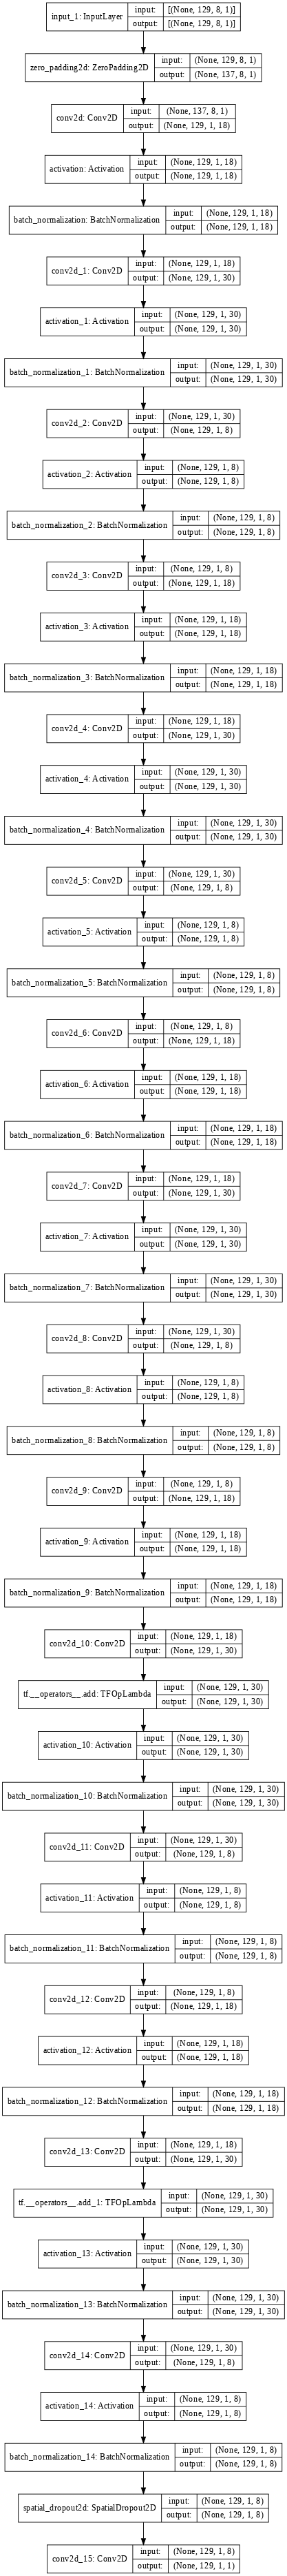

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
model.load_weights('/content/denoiser_cnn_log_mel_generator.h5')
baseline_val_loss = model.evaluate(test_dataset)[0]
print(baseline_val_loss)

393/393 [==============================] - 80s 204ms/step - loss: 0.0969 - rmse: 0.3112
0.09501483291387558


In [ ]:
def l2_norm(vector):
    return np.square(vector)

def SDR(denoised, cleaned, eps=1e-7): # Signal to Distortion Ratio
    a = l2_norm(denoised)
    b = l2_norm(denoised - cleaned)
    a_b = a / b
    return np.mean(10 * np.log10(a_b + eps))

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, baseline=baseline_val_loss)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, update_freq='batch')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/denoiser_cnn_log_mel_generator.h5', 
                                                         monitor='val_loss', save_best_only=True)

model.fit(train_dataset,
         steps_per_epoch=600,
         validation_data=test_dataset,
         epochs=25,
         callbacks=[early_stopping_callback, tensorboard_callback, checkpoint_callback]
        )

Epoch 1/25
600/600 [==============================] - 793s 1s/step - loss: 0.0916 - rmse: 0.3027 - val_loss: 0.0940 - val_rmse: 0.3066
Epoch 2/25
600/600 [==============================] - 791s 1s/step - loss: 0.0943 - rmse: 0.3071 - val_loss: 0.0925 - val_rmse: 0.3041
Epoch 3/25
600/600 [==============================] - 787s 1s/step - loss: 0.0908 - rmse: 0.3014 - val_loss: 0.0937 - val_rmse: 0.3062
Epoch 4/25
600/600 [==============================] - 786s 1s/step - loss: 0.0948 - rmse: 0.3079 - val_loss: 0.0949 - val_rmse: 0.3080
Epoch 5/25
600/600 [==============================] - 788s 1s/step - loss: 0.0917 - rmse: 0.3028 - val_loss: 0.0975 - val_rmse: 0.3122
Epoch 6/25
600/600 [==============================] - 782s 1s/step - loss: 0.0918 - rmse: 0.3030 - val_loss: 0.1008 - val_rmse: 0.3174
Epoch 7/25
600/600 [==============================] - 787s 1s/step - loss: 0.0920 - rmse: 0.3033 - val_loss: 0.1014 - val_rmse: 0.3184
Epoch 8/25
600/600 [==============================] - 7

In [ ]:
val_loss = model.evaluate(test_dataset)[0]

393/393 [==============================] - 91s 231ms/step - loss: 0.0957 - rmse: 0.3093


In [ ]:
model.save('drive/My Drive/Colab Notebooks/cnn_denoise_1.h5')
#model.load_weights('drive/My Drive/datasets/one_noise_data/model.h5')

## Testing

In [ ]:
def read_audio(filepath, sample_rate, normalize=True):
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize:
      div_fac = 1 / np.max(np.abs(audio)) / 3.0
      audio = audio * div_fac
    return audio, sr

def write_audio(filepath, sample_rate, data):
    return librosa.output.write_wav(filepath, data, sample_rate)
        
def add_noise_to_clean_audio(clean_audio, noise_signal):
    if len(clean_audio) >= len(noise_signal):
        # print("The noisy signal is smaller than the clean audio input. Duplicating the noise.")
        while len(clean_audio) >= len(noise_signal):
            noise_signal = np.append(noise_signal, noise_signal)

    ## Extract a noise segment from a random location in the noise file
    ind = np.random.randint(0, noise_signal.size - clean_audio.size)

    noiseSegment = noise_signal[ind: ind + clean_audio.size]

    speech_power = np.sum(clean_audio ** 2)
    noise_power = np.sum(noiseSegment ** 2)
    noisyAudio = clean_audio + np.sqrt(speech_power / noise_power) * noiseSegment
    return noisyAudio

def play(audio, sample_rate):
    ipd.display(ipd.Audio(data=audio, rate=sample_rate))  # load a local WAV file

In [ ]:
class FeatureExtractor:
    def __init__(self, audio, *, windowLength, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = windowLength
        self.window_length = windowLength
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)

    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True)

    def get_mel_spectrogram(self):
        return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
                                           n_fft=self.ffT_length, hop_length=self.overlap, center=True)

    def get_audio_from_mel_spectrogram(self, M):
        return librosa.feature.inverse.mel_to_audio(M, sr=self.sample_rate, n_fft=self.ffT_length, hop_length=self.overlap,
                                             win_length=self.window_length, window=self.window,
                                             center=True, pad_mode='reflect', power=2.0, n_iter=32, length=None)

In [ ]:
cleanAudio, sr = read_audio(os.path.join('/content/dataset/en/test/common_voice_en_16526.mp3'), sample_rate=fs)
print("Min:", np.min(cleanAudio),"Max:",np.max(cleanAudio))
ipd.Audio(data=cleanAudio, rate=sr) # load a local WAV file

In [ ]:
noiseAudio, sr = read_audio(os.path.join('/content/dataset/UrbanSound8K/test/7913-3-0-0.wav'), sample_rate=fs)
print("Min:", np.min(noisyAudio),"Max:",np.max(noisyAudio))
ipd.Audio(data=noisyAudio, rate=sr) # load a local WAV file

In [ ]:
noisyAudio, sr = read_audio(os.path.join('/content/suaracampuran.wav'), sample_rate=fs)
print("Min:", np.min(noisyAudio),"Max:",np.max(noisyAudio))
ipd.Audio(data=noisyAudio, rate=sr) # load a local WAV file

Min: -0.28508356 Max: 0.33333334


In [ ]:
def prepare_input_features(stft_features):
    
    noisySTFT = np.concatenate([stft_features[:,0:numSegments-1], stft_features], axis=1)
    stftSegments = np.zeros((numFeatures, numSegments , noisySTFT.shape[1] - numSegments + 1))

    for index in range(noisySTFT.shape[1] - numSegments + 1):
        stftSegments[:,:,index] = noisySTFT[:,index:index + numSegments]
    return stftSegments

In [ ]:
noiseAudioFeatureExtractor = FeatureExtractor(noisyAudio, windowLength=windowLength, overlap=overlap, sample_rate=sr)
noise_stft_features = noiseAudioFeatureExtractor.get_stft_spectrogram()

# Paper: Besides, spectral phase was not used in the training phase.
# At reconstruction, noisy spectral phase was used instead to
# perform in- verse STFT and recover human speech.
noisyPhase = np.angle(noise_stft_features)
print(noisyPhase.shape)
noise_stft_features = np.abs(noise_stft_features)

mean = np.mean(noise_stft_features)
std = np.std(noise_stft_features)
noise_stft_features = (noise_stft_features - mean) / std

(129, 877)


In [ ]:
predictors = prepare_input_features(noise_stft_features)

In [ ]:
predictors = np.reshape(predictors, (predictors.shape[0], predictors.shape[1], 1, predictors.shape[2]))
predictors = np.transpose(predictors, (3, 0, 1, 2)).astype(np.float32)
print('predictors.shape:', predictors.shape)

predictors.shape: (877, 129, 8, 1)


In [ ]:
STFTFullyConvolutional = model.predict(predictors)
print(STFTFullyConvolutional.shape)

(877, 129, 1, 1)


In [ ]:
def revert_features_to_audio(features, phase, cleanMean=None, cleanStd=None):
    # 
    if cleanMean and cleanStd:
        features = cleanStd * features + cleanMean

    phase = np.transpose(phase, (1, 0))
    features = np.squeeze(features)

    # features = librosa.db_to_power(features)
    features = features * np.exp(1j * phase)  # that fixes the abs() ope previously done

    features = np.transpose(features, (1, 0))
    return noiseAudioFeatureExtractor.get_audio_from_stft_spectrogram(features)

In [ ]:
from scipy.io import wavfile
denoisedAudioFullyConvolutional = revert_features_to_audio(STFTFullyConvolutional, noisyPhase, mean, std)
print("Min:", np.min(denoisedAudioFullyConvolutional),"Max:",np.max(denoisedAudioFullyConvolutional))

wavfile.write('/content/dataset/UrbanSound8K/test/reductionnoise.wav', 16000, noisyAudio)
ipd.Audio(data=denoisedAudioFullyConvolutional, rate=fs) # load a local WAV file

Min: -0.15929715 Max: 0.1627896


# Plot

Waveform & Spectrogram Noisy Audio

Sampling rate: 16000 samples/second
Signal size: 56064 samples
Signal duration: 3.504 seconds


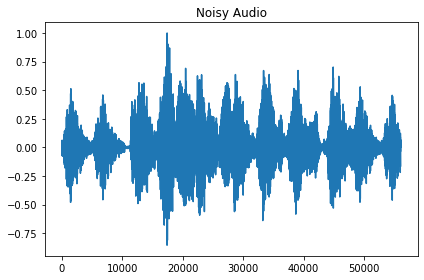

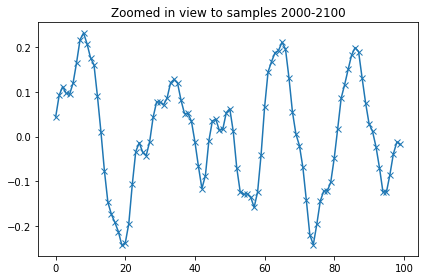

In [ ]:
import soundfile
import matplotlib.pyplot as plt
audio_signal, sampling_rate = soundfile.read('/content/dataset/UrbanSound8K/test/anjingkacili.wav')
print('Sampling rate: {} samples/second'.format(sampling_rate))
print('Signal size: {} samples'.format(audio_signal.shape[0]))
print('Signal duration: {:.3f} seconds'.format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.title('Noisy Audio')
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[2000:2100], marker='x')
plt.title('Zoomed in view to samples 2000-2100')
plt.tight_layout()

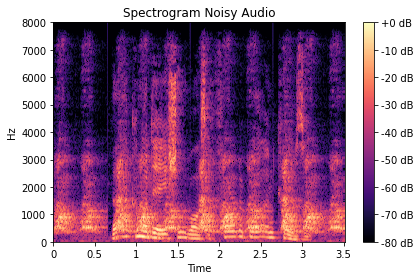

In [ ]:
import numpy as np
import librosa
from librosa.display import specshow
window_length = int(0.025 * sampling_rate)
hop_length = int(0.01 * sampling_rate)
spectrogram = np.abs(librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length))
specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, y_axis='linear', x_axis='time')
plt.title('Spectrogram Noisy Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Waveform & Spectrogram Reduction Audio

Sampling rate: 16000 samples/second
Signal size: 56064 samples
Signal duration: 3.504 seconds


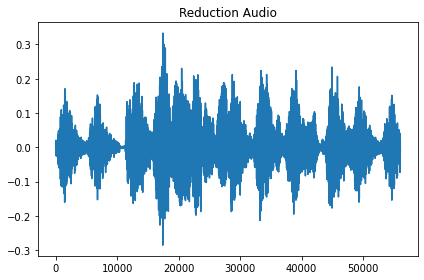

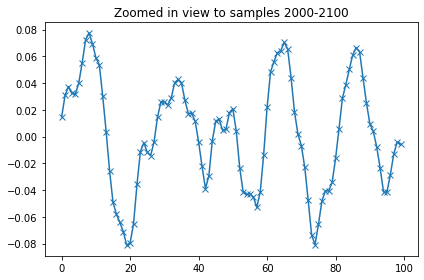

In [ ]:
import soundfile
import matplotlib.pyplot as plt
audio_signalX, sampling_rate = soundfile.read('/content/dataset/UrbanSound8K/test/reductionnoise.wav')
print('Sampling rate: {} samples/second'.format(sampling_rate))
print('Signal size: {} samples'.format(audio_signalX.shape[0]))
print('Signal duration: {:.3f} seconds'.format(audio_signalX.shape[0] / sampling_rate))
plt.plot(audio_signalX)
plt.title('Reduction Audio')
plt.tight_layout()
plt.figure()
plt.plot(audio_signalX[2000:2100], marker='x')
plt.title('Zoomed in view to samples 2000-2100')
plt.tight_layout()

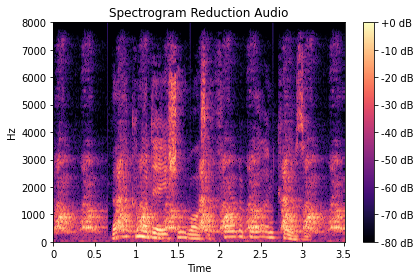

In [ ]:
import numpy as np
import librosa
from librosa.display import specshow
window_length = int(0.025 * sampling_rate)
hop_length = int(0.01 * sampling_rate)
spectrogram = np.abs(librosa.stft(audio_signalX, hop_length=hop_length, win_length=window_length))
specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, y_axis='linear', x_axis='time')
plt.title('Spectrogram Reduction Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()